In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'zomato_data.csv' with your actual dataset file name)
df = pd.read_csv('zomato_data.csv')

df.head()



,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

df['rate']=df['rate'].apply(handleRate)

print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


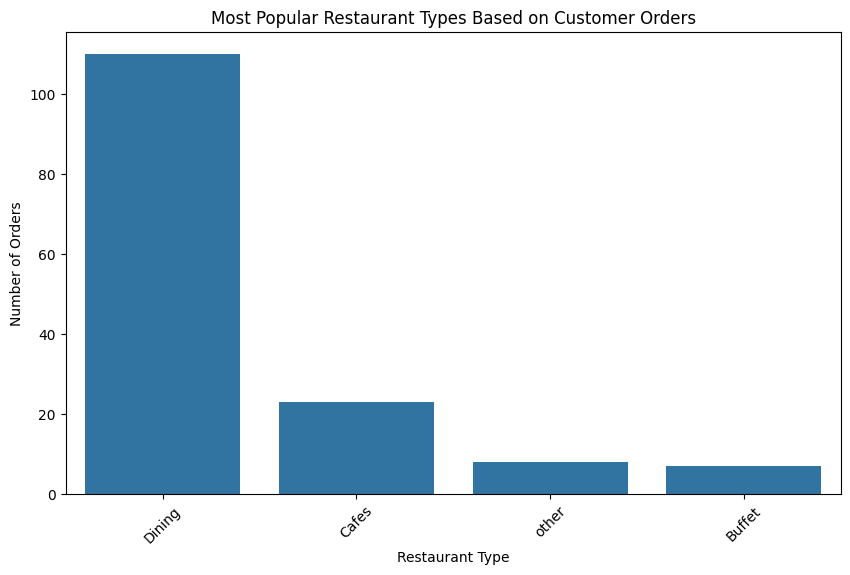

The most popular restaurant type based on customer orders is: Dining


In [ ]:
# 1. Determine the most popular restaurant types based on customer orders
popular_restaurant_types = df['listed_in(type)']

# Visualize the popular restaurant types
plt.figure(figsize=(10, 6))
sns.countplot(x=popular_restaurant_types, order=popular_restaurant_types.value_counts().index)
plt.title('Most Popular Restaurant Types Based on Customer Orders')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Print the most popular restaurant type
most_popular_type = popular_restaurant_types.value_counts().idxmax()
print(f"The most popular restaurant type based on customer orders is: {most_popular_type}")



Votes per Restaurant Type:
listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


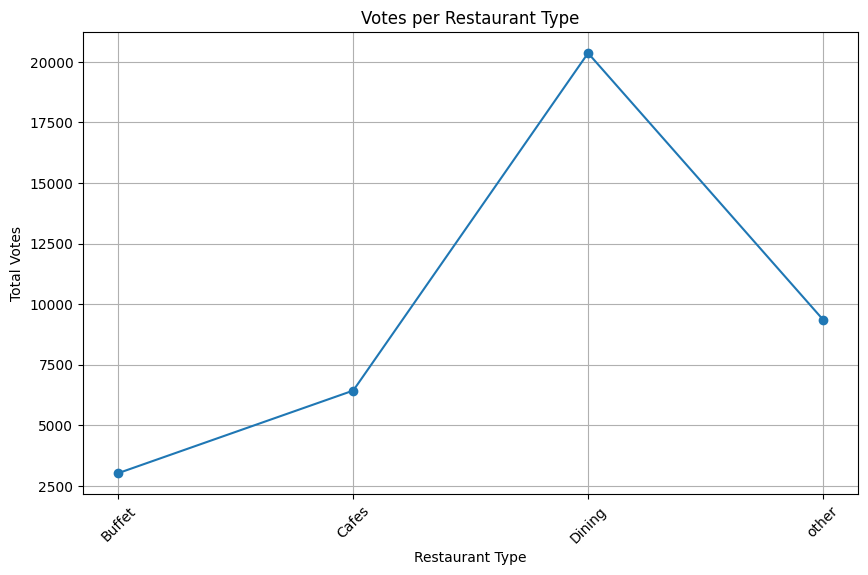

In [ ]:
# 2. Count the number of votes received by each type of restaurant
votes_per_restaurant_type = df.groupby('listed_in(type)')['votes'].sum()
print("\nVotes per Restaurant Type:")
print(votes_per_restaurant_type)

# Visualize the votes per restaurant type using a line chart
plt.figure(figsize=(10, 6))
plt.plot(votes_per_restaurant_type.index, votes_per_restaurant_type.values, marker='o', linestyle='-')
plt.title('Votes per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


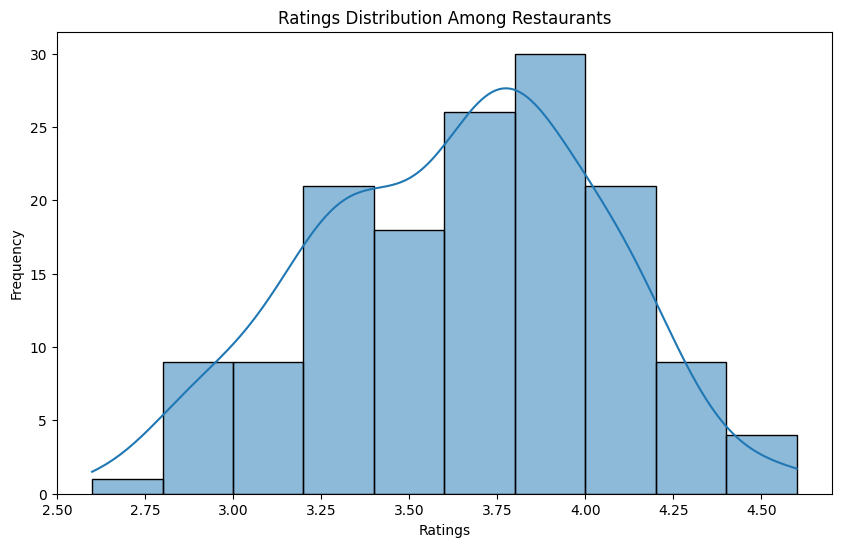


The majority of restaurant ratings lie around the rating: 3.8


In [ ]:
# 3. Analyze the ratings that the majority of restaurants have received
ratings_distribution = df['rate'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=10, kde=True)
plt.title('Ratings Distribution Among Restaurants')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

most_common_rating_range = df['rate'].mode().values[0]

print(f"\nThe majority of restaurant ratings lie around the rating: {most_common_rating_range}")


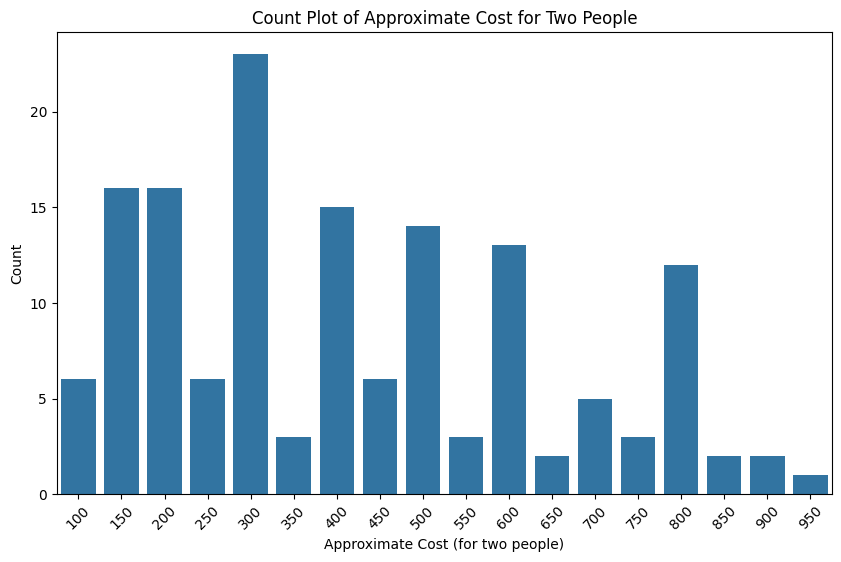

The approximate cost for two people with the maximum count is: 300


In [ ]:
# 4. Average Spending for two people
average_spending = df['approx_cost(for two people)']


# Plot a count plot for average spending without sorting
plt.figure(figsize=(10, 6))
sns.countplot(x='approx_cost(for two people)', data=df)
plt.title('Count Plot of Approximate Cost for Two People')
plt.xlabel('Approximate Cost (for two people)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Print the approximate cost with the maximum count
most_common_cost = df['approx_cost(for two people)'].mode().values[0]
print(f"The approximate cost for two people with the maximum count is: {most_common_cost}")


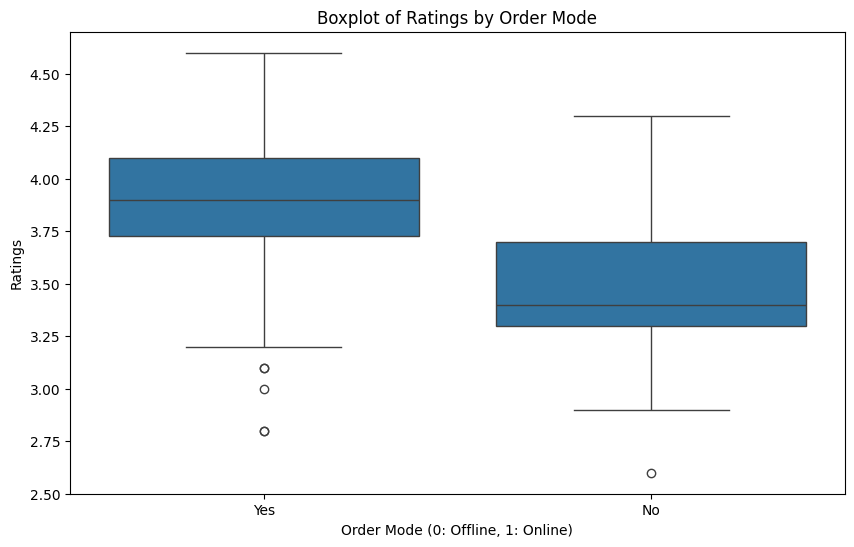

In [ ]:
# 5. Identify which mode (online or offline) has received the maximum rating

# Prepare data for boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Boxplot of Ratings by Order Mode')
plt.xlabel('Order Mode (0: Offline, 1: Online)')
plt.ylabel('Ratings')
plt.show()

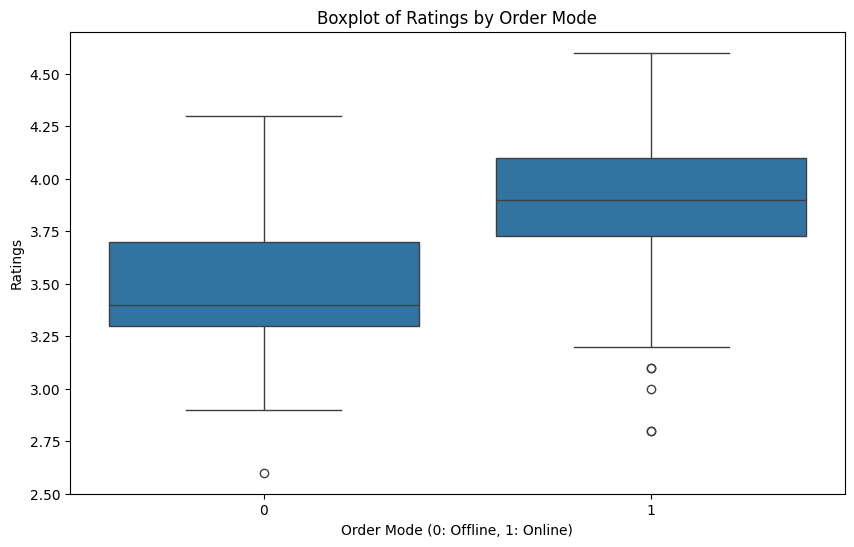

Median rating for online orders: 3.9
Median rating for offline orders: 3.4
Conclusion: The box plot shows that online orders have a higher median rating than offline orders, indicating that customers tend to rate online orders more favorably.


In [ ]:
# Convert 'Yes'/'No' in 'online_order' column to 1/0
df['online_order'] = df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Boxplot of Ratings by Order Mode')
plt.xlabel('Order Mode (0: Offline, 1: Online)')
plt.ylabel('Ratings')
plt.show()

online_ratings = df[df['online_order'] == 1]['rate']
offline_ratings = df[df['online_order'] == 0]['rate']

online_median = online_ratings.median()
offline_median = offline_ratings.median()

print(f"Median rating for online orders: {online_median}")
print(f"Median rating for offline orders: {offline_median}")

if online_median > offline_median:
    print("Conclusion: The box plot shows that online orders have a higher median rating than offline orders, indicating that customers tend to rate online orders more favorably.")
else:
    print("Conclusion: The box plot shows that offline orders have a higher median rating than online orders, indicating that customers tend to rate offline orders more favorably.")


Cross-tabulation of Restaurant Type and Order Mode:
order_mode       offline  online
listed_in(type)                 
Buffet                 3       4
Cafes                  8      15
Dining                77      33
other                  2       6


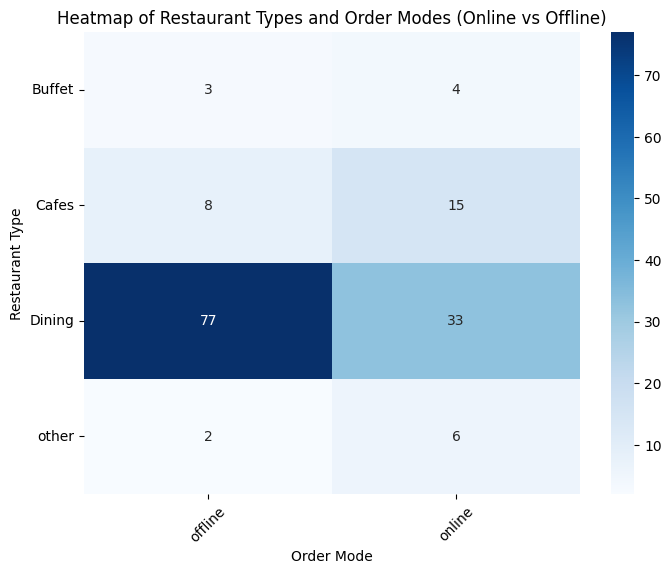

Restaurant Type with the most online orders: Dining (33 orders)
Restaurant Type with the most offline orders: Dining (77 orders)


In [ ]:
#Find out which Type of restuarant recieved more online and ofline order respectively
# Convert 'Yes'/'No' in 'online_order' column to 'online'/'offline'
df['order_mode'] = df['online_order'].apply(lambda x: 'online' if x == 1 else 'offline')

# Create a cross-tabulation of restaurant type and order mode
order_mode_counts = pd.crosstab(df['listed_in(type)'], df['order_mode'])

# Print the cross-tabulation
print("\nCross-tabulation of Restaurant Type and Order Mode:")
print(order_mode_counts)

# Plot a heatmap to visualize the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(order_mode_counts, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap of Restaurant Types and Order Modes (Online vs Offline)')
plt.xlabel('Order Mode')
plt.ylabel('Restaurant Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Find the restaurant type with the most online orders
most_online_orders = order_mode_counts['online'].idxmax()
most_online_orders_count = order_mode_counts['online'].max()

# Find the restaurant type with the most offline orders
most_offline_orders = order_mode_counts['offline'].idxmax()
most_offline_orders_count = order_mode_counts['offline'].max()

print(f"Restaurant Type with the most online orders: {most_online_orders} ({most_online_orders_count} orders)")
print(f"Restaurant Type with the most offline orders: {most_offline_orders} ({most_offline_orders_count} orders)")
